# Kings County Washington State Housing Prices

### Overview

When you are buying or selling the house, what are the key factors that would determine the price of the house? According to inman.com, there are 6 factors that influence home values: historical sale prices, neighborhood, the market, size and appeal, age and condition, and nearby features. 

As a family of military members, it is very stressful to find home every time when you have to move due to PCS (permanent change of station). Since most of us are new to the location, we can only find out through listed housing prices on the websites. (write more about how to get best house price considering all of the things)

## Data Preparation

In [2]:


#scientific notation
pd.set_option('display.float_format', lambda x: '%1f' % x)

In [3]:
df = pd.read_csv(os.path.join("../", "data", "kc_house_data.csv"))
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000000,3,1.000000,1180,5650,1.000000,nan,0.000000,...,7,1180,0.0,1955,0.000000,98178,47.511200,-122.257000,1340,5650
1,6414100192,12/9/2014,538000.000000,3,2.250000,2570,7242,2.000000,0.000000,0.000000,...,7,2170,400.0,1951,1991.000000,98125,47.721000,-122.319000,1690,7639
2,5631500400,2/25/2015,180000.000000,2,1.000000,770,10000,1.000000,0.000000,0.000000,...,6,770,0.0,1933,nan,98028,47.737900,-122.233000,2720,8062
3,2487200875,12/9/2014,604000.000000,4,3.000000,1960,5000,1.000000,0.000000,0.000000,...,7,1050,910.0,1965,0.000000,98136,47.520800,-122.393000,1360,5000
4,1954400510,2/18/2015,510000.000000,3,2.000000,1680,8080,1.000000,0.000000,0.000000,...,8,1680,0.0,1987,0.000000,98074,47.616800,-122.045000,1800,7503


In [4]:
df = df.set_index('price').reset_index()

In [5]:
df.columns.to_list()

['price',
 'id',
 'date',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [6]:
#Inspecting dataset for types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   id             21597 non-null  int64  
 2   date           21597 non-null  object 
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

**Observations:**
* **bedrooms:** 'waterfront', 'view', 'yr_renovated' seems like it has missing values. (non-null counts are less than total rows)
* **sqft_basement:** dtype is object. In this column, it might have characters that are not numbers. 

In [7]:
#Checking for any null values
df.isna().sum()

price               0
id                  0
date                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
df.describe()

,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,540296.573506,4580474287.770987,3.373200,2.115826,2080.321850,15099.408760,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,367368.140101,2876735715.747780,0.926299,0.768984,918.106125,41412.636876,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,78000.000000,1000102.000000,1.000000,0.500000,370.000000,520.000000,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,322000.000000,2123049175.000000,3.000000,1.750000,1430.000000,5040.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,450000.000000,3904930410.000000,3.000000,2.250000,1910.000000,7618.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,645000.000000,7308900490.000000,4.000000,2.500000,2550.000000,10685.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7700000.000000,9900000190.000000,33.000000,8.000000,13540.000000,1651359.000000,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


**Observations:**
* **bedrooms:** 1 bedrooms to 33 bedrooms
* **bathrooms:** 0.5baths to 8 baths
* **waterfront:** only has values of 1 and 0
* **view:**: 0%, 25%, 50%, and 75% are 0s
* **yr_built:** houses are from 1900 to 2015
* **yr_renovated:** minimum is 0 - does that mean some houses never renovated after it was built?

In [9]:
df.bedrooms.value_counts()
#33 bedroom seems like an error

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [10]:
df = df.sort_values(by=['bedrooms'], ascending = False)
df.head()

,price,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,640000.000000,2402100895,6/25/2014,33,1.750000,1620,6000,1.000000,0.000000,0.000000,...,7,1040,580.0,1947,0.000000,98103,47.687800,-122.331000,1330,4700
8748,520000.000000,1773100755,8/21/2014,11,3.000000,3000,4960,2.000000,0.000000,0.000000,...,7,2400,600.0,1918,1999.000000,98106,47.556000,-122.363000,1420,4960
13301,1150000.000000,627300145,8/14/2014,10,5.250000,4590,10920,1.000000,0.000000,2.000000,...,9,2500,2090.0,2008,0.000000,98004,47.586100,-122.113000,2730,10400
19239,660000.000000,8812401450,12/29/2014,10,3.000000,2920,3745,2.000000,0.000000,0.000000,...,7,1860,1060.0,1913,0.000000,98105,47.663500,-122.320000,1810,3745
15147,650000.000000,5566100170,10/29/2014,10,2.000000,3610,11914,2.000000,0.000000,0.000000,...,7,3010,600.0,1958,0.000000,98006,47.570500,-122.175000,2040,11914


In [11]:
df.bathrooms.value_counts()

2.500000    5377
1.000000    3851
1.750000    3048
2.250000    2047
2.000000    1930
1.500000    1445
2.750000    1185
3.000000     753
3.500000     731
3.250000     589
3.750000     155
4.000000     136
4.500000     100
4.250000      79
0.750000      71
4.750000      23
5.000000      21
5.250000      13
5.500000      10
1.250000       9
6.000000       6
5.750000       4
0.500000       4
8.000000       2
6.750000       2
6.250000       2
6.500000       2
7.750000       1
7.500000       1
Name: bathrooms, dtype: int64

In [12]:
df.waterfront.value_counts()
#it seems like houses with waterfront is 1 without is 0

0.000000    19075
1.000000      146
Name: waterfront, dtype: int64

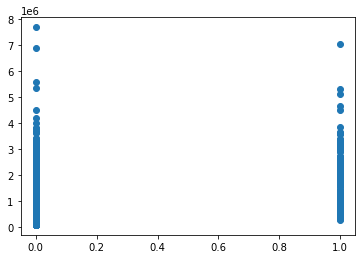

In [13]:
plt.scatter(df.waterfront, df.price)

It seems like the price isn't really affected by having waterfront

In [14]:
df.view.value_counts()

0.000000    19422
2.000000      957
3.000000      508
1.000000      330
4.000000      317
Name: view, dtype: int64

In [15]:
df.yr_built.value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

(1900.0, 2020.0)

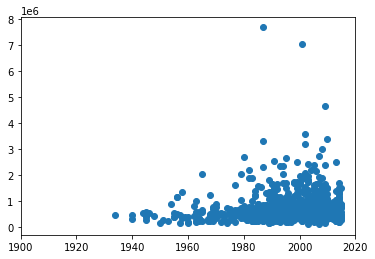

In [16]:
plt.scatter(df["yr_renovated"], df["price"])
plt.xlim(1900, 2020)

yr_renovation is not affecting the price strongly

In [17]:
df.yr_renovated.value_counts()

0.000000       17011
2014.000000       73
2003.000000       31
2013.000000       31
2007.000000       30
               ...  
1976.000000        1
1944.000000        1
1948.000000        1
1950.000000        1
1954.000000        1
Name: yr_renovated, Length: 70, dtype: int64

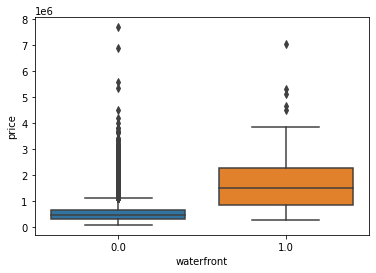

In [18]:
sns.boxplot(x="waterfront", y="price", data=df)

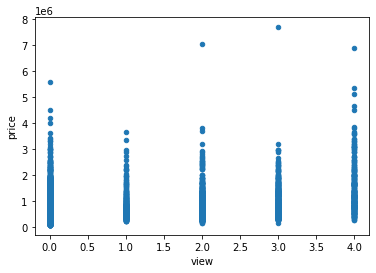

In [19]:
df.plot.scatter(x="view", y="price")

In [21]:
#Dropping columns
df1 = df.drop(columns = ['view', 'waterfront', 'id', 'yr_renovated', 'sqft_living15', 'sqft_lot15'])
df1 = df1[df1.bedrooms != 33]

In [22]:
df1.head()

,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long
8748,520000.000000,8/21/2014,11,3.000000,3000,4960,2.000000,3,7,2400,600.0,1918,98106,47.556000,-122.363000
13301,1150000.000000,8/14/2014,10,5.250000,4590,10920,1.000000,3,9,2500,2090.0,2008,98004,47.586100,-122.113000
19239,660000.000000,12/29/2014,10,3.000000,2920,3745,2.000000,4,7,1860,1060.0,1913,98105,47.663500,-122.320000
15147,650000.000000,10/29/2014,10,2.000000,3610,11914,2.000000,4,7,3010,600.0,1958,98006,47.570500,-122.175000
6073,1280000.000000,8/8/2014,9,4.500000,3650,5000,2.000000,3,8,2530,1120.0,1915,98105,47.660400,-122.289000


In [23]:
df1.shape

(21596, 15)

## Data Understanding

In [25]:
corr = df1.corr()

In [40]:
df1.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long
price,1.000000,0.315961,0.525915,0.701929,0.089879,0.256820,0.036031,0.667964,0.605392,0.053965,-0.053409,0.306687,0.022047
bedrooms,0.315961,1.000000,0.527870,0.593178,0.033602,0.183707,0.023440,0.366174,0.492543,0.160736,-0.158588,-0.011595,0.136561
bathrooms,0.525915,0.527870,1.000000,0.755755,0.088368,0.502574,-0.126443,0.665834,0.686664,0.507166,-0.204778,0.024301,0.224889
sqft_living,0.701929,0.593178,0.755755,1.000000,0.173449,0.353941,-0.059397,0.762776,0.876448,0.318140,-0.199793,0.052178,0.241200
sqft_lot,0.089879,0.033602,0.088368,0.173449,1.000000,-0.004824,-0.008806,0.114726,0.184134,0.052939,-0.129582,-0.085507,0.230222
floors,0.256820,0.183707,0.502574,0.353941,-0.004824,1.000000,-0.264013,0.458783,0.523970,0.489175,-0.059522,0.049280,0.125912
condition,0.036031,0.023440,-0.126443,-0.059397,-0.008806,-0.264013,1.000000,-0.146854,-0.158826,-0.361555,0.002835,-0.015209,-0.105800
grade,0.667964,0.366174,0.665834,0.762776,0.114726,0.458783,-0.146854,1.000000,0.756069,0.447854,-0.185761,0.113602,0.200324
sqft_above,0.605392,0.492543,0.686664,0.876448,0.184134,0.523970,-0.158826,0.756069,1.000000,0.424017,-0.261557,-0.001160,0.344819
yr_built,0.053965,0.160736,0.507166,0.318140,0.052939,0.489175,-0.361555,0.447854,0.424017,1.000000,-0.347199,-0.148340,0.409974


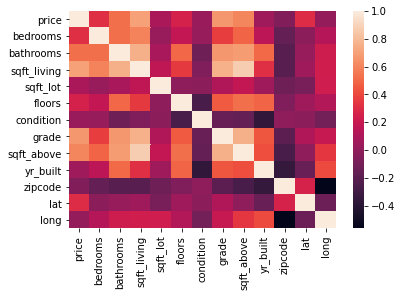

In [26]:
sns.heatmap(corr);

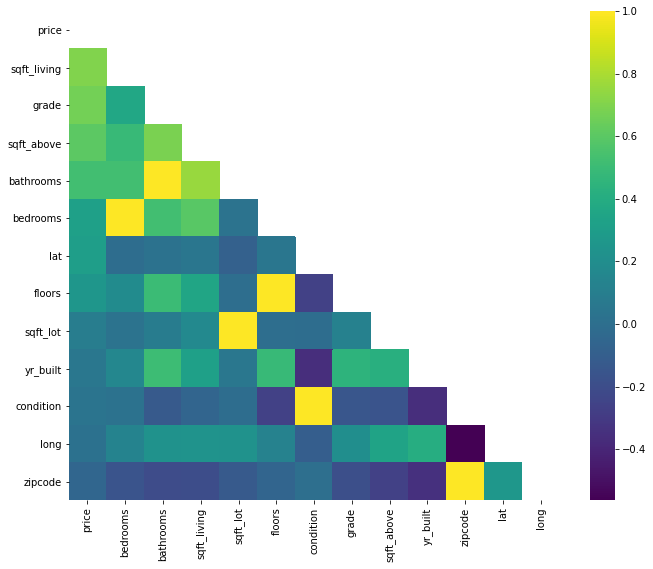

In [27]:
corr = corr.sort_values(by='price', ascending=False)
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, ax=ax1, cmap="viridis");

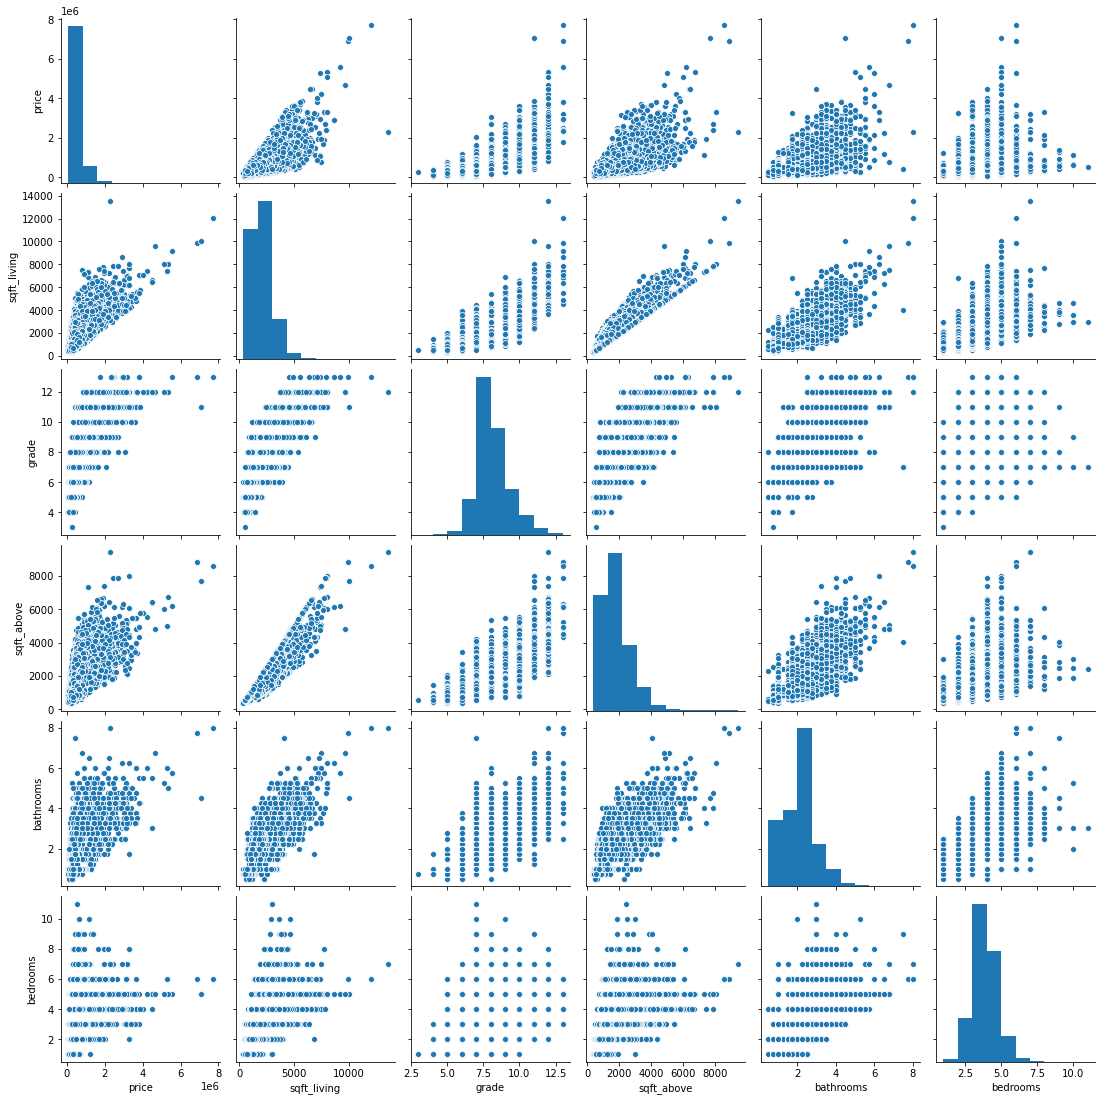

In [28]:
positively_correlated_cols = ['price','sqft_living', 'grade', 'sqft_above', 'bathrooms', 'bedrooms']
positively_correlated_df = df1[positively_correlated_cols]
sns.pairplot(positively_correlated_df);

## First Simple Model

In [65]:
fsm_df = df1[["sqft_above", "price"]].copy()

In [66]:
fsm = ols(formula="price ~ sqft_above", data=fsm_df)
fsm_results = fsm.fit()

In [67]:
fsm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                 1.249e+04
Date:                Tue, 27 Apr 2021   Prob (F-statistic):               0.00
Time:                        11:28:16   Log-Likelihood:            -3.0245e+05
No. Observations:               21596   AIC:                         6.049e+05
Df Residuals:                   21594   BIC:                         6.049e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.972e+04   4737.744     12.604      0.000    5.04e+04     6.9e+04
sqft_above   268.6836      2.404    111.771      0.000     263.972     273.395
==============================================================================
Omnibus:                    16491.699   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           728342.999
Skew:                           3.265   Prob(JB):                         0.00
Kurtosis:                      30.691   Cond. No.                     4.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Evaluation
First model explains only 37% of the variance in the price.

$59720
268.68 sqft

#### Linearlity

In [53]:
#Rainbow Testing
rainbow_statistic, rainbow_p_value = linear_rainbow(fsm_results)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.4501546680540505
Rainbow p-value: 6.5122812353687524e-83


Low p-value means that the first model violates the linearity assumption

#### Normality

Prob(JB): 0.00 does that mean we are violating the assumption? wrong model?

#### Homoscadasticity

In [54]:
y = fsm_df["price"]
y_hat = fsm_results.predict()

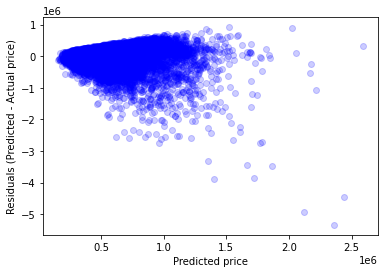

In [59]:
fig2, ax2 = plt.subplots()
ax2.set(xlabel="Predicted price",
        ylabel="Residuals (Predicted - Actual price)")
ax2.scatter(x=y_hat, y=y_hat-y, color="blue", alpha=0.2);

In [60]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(y-y_hat, fsm_df[["sqft_above"]])
print("Lagrange Multiplier p-value:", lm_p_value)
print("F-statistic p-value:", f_p_value)

Lagrange Multiplier p-value: nan
F-statistic p-value: 0.0
